### Könyvtárak importálása

In [85]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X és y adatok generálása

In [86]:
X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3.3, 4.2, 5.4, 6.1, 7.3, 8.2])

### Dataframe keszítés X-ből és y-ból

In [87]:
X = pd.Series(X)
y = pd.Series(y)

Xy = {'X': X, 'y': y}

df = pd.DataFrame(Xy)
df

,X,y
0,1,3.3
1,2,4.2
2,3,5.4
3,4,6.1
4,5,7.3
5,6,8.2


### B0 és B1 kezdőértékének és regresszió függvény inicializálása

In [90]:
B0 = 0                      #B0 együttható kezdőértéke
B1 = 0                      #B1 együttható kezdőértéke

y_ = np.array(B0 + B1*df.X) #y_ regresszió függvény megadása

### X és y pontok valamint y_ regressziós egyenes ábrázolása

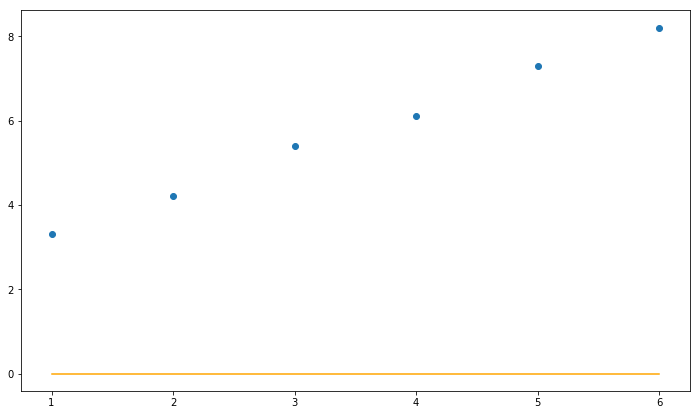

In [91]:
plt.figure(figsize=(12, 7)) #Grafikon mérete
plt.scatter(df.X, df.y)     #X és y pontok ábárzolása
plt.plot(df.X, y_, color='orange')          #Regressziós egyenes ábrázolása

### Gradient descent függvény írása lépsről lépésre követéshez

In [107]:
def y_kalap(b0, b1, x):
    return np.array(b0 + np.array(x)*b1)

def gradient_descent(b0, b1, x, y, alpha):    
    #B0 parciális deriváltja
    db0 = np.sum(y_kalap(b0, b1, x) - np.array(y))

    #B1 parciális deriváltja
    db1 = np.sum((y_kalap(b0, b1, x) - np.array(y))*np.array(x))
    
    #B0 értékének frissítése
    b0 = b0 - db0*alpha
    print('B0: ', b0)

    #B1 értékének frissítése
    b1 = b1 - db1*alpha
    print('B1: ', b1)
    
    #Regresszió függvény frissítése
    y_ = y_kalap(b0, b1, x)
    hiba = np.sum((np.array(y_) - np.array(y))**2)
    print('\nÖsszes hiba: ', hiba)
    
    plt.figure(figsize=(12, 7))
    plt.scatter(x, y, label=None)
    plt.plot(x, y_, color='orange', label=('y_ = {0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), 'X'))
    plt.legend()
    
    return b0, b1

### Gradient descent algoritmus egyszeri meghívása

B0:  1.906612517927198
B1:  1.0776015182489358

Összes hiba:  0.2301017607591908


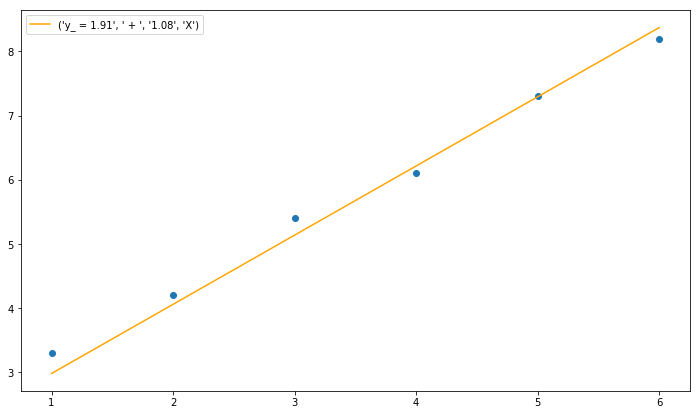

In [179]:
B0, B1 = gradient_descent(B0, B1, df.X, df.y, 0.01)

### Gradient descent függvény írása ciklushoz

In [103]:
def y_kalap(b0, b1, x, alpha):
    return np.array(b0 + np.array(x)*b1)

def gradient_descent_ciklus(b0, b1, x, y, ciklusok_száma, alpha):   
    for i in range(ciklusok_száma):
        #együtthatók parciális deriváltjainak kiszámítása
        db0 = np.sum(y_kalap(b0, b1, x, alpha) - np.array(y))
        db1 = np.sum((y_kalap(b0, b1, x, alpha) - np.array(y))*np.array(x))

        #együtthatók értékeinek frissítése
        b0 = b0 - db0*alpha
        b1 = b1 - db1*alpha
        
        #y_ regresszió függvény frissítése és hiba újraszámolása
        y_ = y_kalap(b0, b1, x, alpha)                  
        hiba = np.sum((np.array(y_) - np.array(y))**2)
      
    #Regresszió függvény ábrázolása
    plt.figure(figsize=(12, 7))
    plt.scatter(x, y, label=None) 
    plt.plot(x, y_, color='orange', label=('y_ = {0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), 'X'))
    plt.legend()
    
    print('B0:', b0)
    print('B1:', b1)
    print('\nÖsszes hiba: ', hiba)
    
    return b0, b1

### Gradient descent függvény hívása

B0: 2.2999675035768674
B1: 0.9857218762109969

Összes hiba:  0.051428572647812275


(2.2999675035768674, 0.9857218762109969)

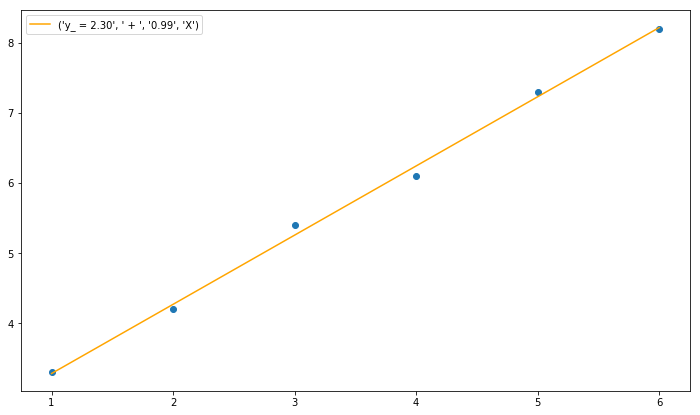

In [104]:
gradient_descent_ciklus(B0, B1, df.X, df.y, 1000, 0.01)